In [ ]:
# 0. install
!pip install SimpleITK # install SimpleITK
!git clone https://github.com/kevinkwshin/SimpleITK # for data preparing
%cd SimpleITK # into SimpleITK directory

## SimpleITK2Numpy and Numpy2SimpleITK

SimpleITK and numpy indexing access is in opposite order! 

SimpleITK: image[x,y,z]<br>
numpy: image_numpy_array[z,y,x]

### SimpleITK2Numpy

1. ```GetArrayFromImage()```: returns a copy of the image data. You can then freely modify the data as it has no effect on the original SimpleITK image.
2. ```GetArrayViewFromImage()```: returns a view on the image data which is useful for display in a memory efficient manner. You cannot modify the data and __the view will be invalid if the original SimpleITK image is deleted__.

### Numpy2SimpleITK
1. ```GetImageFromArray()```: returns a SimpleITK image with origin set to zero, spacing set to one for all dimensions, and the direction cosine matrix set to identity. Intensity data is copied from the numpy array. __In most cases you will need to set appropriate meta-data values.__ 


In [1]:
# 1. load library
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 2. create dummy sitk image
sitkimage_2D = sitk.Image(64, 48, sitk.sitkFloat32)
sitkimage_3D = sitk.Image(256, 128, 64, sitk.sitkInt16)
sitkimage_RGB = sitk.Image([128,64], sitk.sitkVectorUInt8, 3)

In [3]:
# 3. check shape
# 1) Definition of coordinate system is different!! numpy (H, W) - SimpleITK (W, H)
numpyimage_2D = sitk.GetArrayFromImage(sitkimage_2D)
print('sitkimage_2D shape:',sitkimage_2D.GetSize())
print('numpyimage_2D shape:',numpyimage_2D.shape)

numpyimage_3D = sitk.GetArrayFromImage(sitkimage_3D)
print('sitkimage_3D shape:',sitkimage_3D.GetSize())
print('numpyimage_2D shape:',numpyimage_3D.shape)

numpyimage_RGB = sitk.GetArrayFromImage(sitkimage_RGB)
print('sitkimage_RGB shape:',sitkimage_RGB.GetSize())
print('numpyimage_RGB shape:',numpyimage_RGB.shape)

sitkimage_2D shape: (64, 48)
numpyimage_2D shape: (48, 64)
sitkimage_3D shape: (256, 128, 64)
numpyimage_2D shape: (64, 128, 256)
sitkimage_RGB shape: (128, 64)
numpyimage_RGB shape: (64, 128, 3)


In [4]:
# 3. check shape
# 2) for memory efficient use GetArrayViewFromImage instead of using GetArrayFromImage
print(sitk.GetArrayFromImage(sitkimage_2D).shape, sitk.GetArrayViewFromImage(sitkimage_2D).shape)
print(sitk.GetArrayFromImage(sitkimage_3D).shape, sitk.GetArrayViewFromImage(sitkimage_3D).shape)
print(sitk.GetArrayFromImage(sitkimage_RGB).shape, sitk.GetArrayViewFromImage(sitkimage_RGB).shape)

(48, 64) (48, 64)
(64, 128, 256) (64, 128, 256)
(64, 128, 3) (64, 128, 3)


<h1 align="center">SimpleITK Images</h1>


**Summary:**    

1. Images occupy a region in physical space which is defined by:
  * Origin.
  * Size (number of pixels per dimension).
  * Spacing (unknown consistent units: nm, mm, m, km...).
  * Direction cosine matrix (axis directions in physical space).
  
  These attributes are the image's meta-data. Computing the physical coordinates from image indexes requires all four   components.

2. An image may contain a meta-data dictionary. This supplemental information often includes the image modality (e.g. CT), patient name, and information with respect to the image acquisition. 
3. Image initialization: user specified pixel type, user specified dimensionality (2,3), origin at zero, unit spacing in all dimensions and identity direction cosine matrix, intensities set to zero.
4. Data transfer to/from numpy: GetArrayFromImage (copy), GetArrayViewFromImage (immutable), GetImageFromArray (copy) + set the meta-data yourself. 
5. A common issue with resampling resulting in an all black image is due to (a) incorrect specification of the 
desired output image's spatial domain (its meta-data); or (b) the use of the inverse of the transformation mapping from the output spatial domain to the resampled image.

### Pixel Types

The pixel type is represented as an enumerated type. The following is a table of the enumerated list.

<table>
  <tr><td>sitkUInt8</td><td>Unsigned 8 bit integer</td></tr>
  <tr><td>sitkInt8</td><td>Signed 8 bit integer</td></tr>
  <tr><td>sitkUInt16</td><td>Unsigned 16 bit integer</td></tr>
  <tr><td>sitkInt16</td><td>Signed 16 bit integer</td></tr>
  <tr><td>sitkUInt32</td><td>Unsigned 32 bit integer</td></tr>
  <tr><td>sitkInt32</td><td>Signed 32 bit integer</td></tr>
  <tr><td>sitkUInt64</td><td>Unsigned 64 bit integer</td></tr>
  <tr><td>sitkInt64</td><td>Signed 64 bit integer</td></tr>
  <tr><td>sitkFloat32</td><td>32 bit float</td></tr>
  <tr><td>sitkFloat64</td><td>64 bit float</td></tr>
  <tr><td>sitkComplexFloat32</td><td>complex number of 32 bit float</td></tr>
  <tr><td>sitkComplexFloat64</td><td>complex number of 64 bit float</td></tr>
  <tr><td>sitkVectorUInt8</td><td>Multi-component of unsigned 8 bit integer</td></tr>
  <tr><td>sitkVectorInt8</td><td>Multi-component of signed 8 bit integer</td></tr>
  <tr><td>sitkVectorUInt16</td><td>Multi-component of unsigned 16 bit integer</td></tr>
  <tr><td>sitkVectorInt16</td><td>Multi-component of signed 16 bit integer</td></tr>
  <tr><td>sitkVectorUInt32</td><td>Multi-component of unsigned 32 bit integer</td></tr>
  <tr><td>sitkVectorInt32</td><td>Multi-component of signed 32 bit integer</td></tr>
  <tr><td>sitkVectorUInt64</td><td>Multi-component of unsigned 64 bit integer</td></tr>
  <tr><td>sitkVectorInt64</td><td>Multi-component of signed 64 bit integer</td></tr>
  <tr><td>sitkVectorFloat32</td><td>Multi-component of 32 bit float</td></tr>
  <tr><td>sitkVectorFloat64</td><td>Multi-component of 64 bit float</td></tr>
  <tr><td>sitkLabelUInt8</td><td>RLE label of unsigned 8 bit integers</td></tr>
  <tr><td>sitkLabelUInt16</td><td>RLE label of unsigned 16 bit integers</td></tr>
  <tr><td>sitkLabelUInt32</td><td>RLE label of unsigned 32 bit integers</td></tr>
  <tr><td>sitkLabelUInt64</td><td>RLE label of unsigned 64 bit integers</td></tr>
</table>

There is also `sitkUnknown`, which is used for undefined or erroneous pixel ID's.

Some filters only work with images with a specific pixel type. The primary example is the registration framework which works with sitkFloat32 or sitkFloat64. To address this issue you can either specify the appropriate pixel type when reading or creating the image, or use the <a href="https://itk.org/SimpleITKDoxygen/html/namespaceitk_1_1simple.html#af8c9d7cc96a299a05890e9c3db911885">Cast function</a>.  

# Load natural image (JPG, PNG) and save to DICOM

In [5]:
# 1. load library
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# 2. load JPG file
logo = sitk.ReadImage('data/SimpleITK.jpg')
print('Size of sitk shape:', logo.GetSize())

Size of sitk shape: (200, 53)


Size of sitk shape: (53, 200, 3)


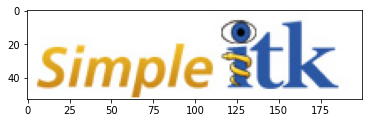

In [12]:
# 3. show JPG file
img = sitk.GetArrayViewFromImage(logo)
plt.imshow(img)
print('Size of sitk shape:', img.shape)

In [17]:
# 4. check meta data (default settings)
print('Origin:',logo.GetOrigin())
print('Spacing:',logo.GetSpacing())
print('Direction cosine matrix:',logo.GetDirection())

Origin: (100.0, 100.0)
Spacing: (2.0, 1.0)
Direction cosine matrix: (1.0, 0.0, 0.0, 1.0)


In [19]:
# 4-1. Transform
# logo.SetOrigin((100,100))
# logo.SetSpacing((2,1))
# logo.SetDirection((0.7071,-0.7071,0.7071,0.7071))

In [10]:
# 5. save png to dcm
sitk.WriteImage(logo, 'SimpleITK.dcm')
!ls SimpleITK.dcm

SimpleITK.dcm


# Load mha file

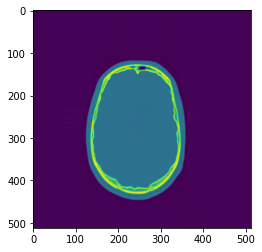

In [21]:
ct = sitk.ReadImage('data/training_001_ct.mha')
img = sitk.GetArrayViewFromImage(ct)
plt.imshow(img[16])

In [22]:
print('Origin:',ct.GetOrigin())
print('Spacing:',ct.GetSpacing())
print('Direction cosine matrix:',ct.GetDirection())

Origin: (0.0, 0.0, 0.0)
Spacing: (0.653595, 0.653595, 4.0)
Direction cosine matrix: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


## Basic Image Attributes (Meta-Data)

You can change the image origin, spacing and direction. Making such changes to an image already containing data should be done cautiously. 

In [23]:
selected_image = sitkimage_3D
print('Before modification:')
print('origin: ' + str(selected_image.GetOrigin()))
print('size: ' + str(selected_image.GetSize()))
print('spacing: ' + str(selected_image.GetSpacing()))
print('direction: ' + str(selected_image.GetDirection()))
print('pixel type: ' + str(selected_image.GetPixelIDTypeAsString()))
print('number of pixel components: ' + str(selected_image.GetNumberOfComponentsPerPixel()))

selected_image.SetOrigin((78.0, 76.0, 77.0))
selected_image.SetSpacing([0.5,0.5,3.0])

print('\nAfter modification:')
print('origin: ' + str(selected_image.GetOrigin()))
print('spacing: ' + str(selected_image.GetSpacing()))

Before modification:
origin: (0.0, 0.0, 0.0)
size: (256, 128, 64)
spacing: (1.0, 1.0, 1.0)
direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
pixel type: 16-bit signed integer
number of pixel components: 1

After modification:
origin: (78.0, 76.0, 77.0)
spacing: (0.5, 0.5, 3.0)


In [24]:
# what if 2D?
selected_image = sitkimage_2D
print('Before modification:')
print('origin: ' + str(selected_image.GetOrigin()))
print('size: ' + str(selected_image.GetSize()))
print('spacing: ' + str(selected_image.GetSpacing()))
print('direction: ' + str(selected_image.GetDirection()))
print('pixel type: ' + str(selected_image.GetPixelIDTypeAsString()))
print('number of pixel components: ' + str(selected_image.GetNumberOfComponentsPerPixel()))

selected_image.SetOrigin((78.0, 76.0, 77.0))
selected_image.SetSpacing([0.5,0.5,3.0])

print('\nAfter modification:')
print('origin: ' + str(selected_image.GetOrigin()))
print('spacing: ' + str(selected_image.GetSpacing()))

Before modification:
origin: (0.0, 0.0)
size: (64, 48)
spacing: (1.0, 1.0)
direction: (1.0, 0.0, 0.0, 1.0)
pixel type: 32-bit float
number of pixel components: 1

After modification:
origin: (78.0, 76.0)
spacing: (0.5, 0.5)
